In [37]:
library(gplots)
library(reshape)

Warning message:
“package ‘reshape’ was built under R version 4.0.5”


In [19]:
df <- read.csv("./clinical_association/Supplementary Table 4.csv",header = TRUE, sep =",", stringsAsFactors=T)

In [20]:
colnames(df)
colnames(df)[15]

[1] "GID"                                    
 [2] "Family_ID"                              
 [3] "Gene"                                   
 [4] "Hit"                                    
 [5] "MTOR_pathway"                           
 [6] "MAPK_pathway"                           
 [7] "WNT_signaling"                          
 [8] "NFkB_pathway"                           
 [9] "Cytoskeleton"                           
[10] "Synaptic_function"                      
[11] "Neurite"                                
[12] "Glycosylation"                          
[13] "Neuronal_migration"                     
[14] "Calcium_dynamics"                       
[15] "Immune"                                 
[16] "Gene_expression"                        
[17] "Ubiquitination"                         
[18] "Lysosome"                               
[19] "Cytoplasm"                              
[20] "ECM"                                    
[21] "Golgi"                                  
[22] "ER"                                     
[23] "Mitochondria"                           
[24] "Plasma_membrane"                        
[25] "Nucleus"                                
[26] "COSMIC"                                 
[27] "SEX"                                    
[28] "Type"                                   
[29] "Balloon_cell"                           
[30] "Sleep_seizures"                         
[31] "History_of_infantile_spasm"             
[32] "History_of_focal_seizure"               
[33] "Abnormal_neurological_examination"      
[34] "Abnormal_neuropsychological_examination"
[35] "PET_hypometabolism"                     
[36] "Developmental_delay"                    
[37] "Developmental_delay_binary"             
[38] "Engel_score_1"                          
[39] "Engel_score_2"                          
[40] "Engel_scoreI_II"                        
[41] "Engel_score_3"                          
[42] "Engel_score_4"                          
[43] "Nuclei_size"                            
[44] "Cell_body_size"                         
[45] "Nu.cell_size_ratio"                     
[46] "Seizure_onset"                          
[47] "Seizure_mean_duration"                  
[48] "Seizure_frequency"                      
[49] "Dysplastic_neuron"                      
[50] "HME"                                    
[51] "TypeI"                                  
[52] "TypeIIA"                                
[53] "TypeIIB"                                
[54] "TypeIII"

[1] "Immune"

In [21]:
colname<-colnames(df)

In [22]:
gene_group<-colname[c(5:6,8,10:18,26)]
phenotype<-colname[c(50:54)]
gene_group
phenotype

[1] "MTOR_pathway"       "MAPK_pathway"       "NFkB_pathway"      
 [4] "Synaptic_function"  "Neurite"            "Glycosylation"     
 [7] "Neuronal_migration" "Calcium_dynamics"   "Immune"            
[10] "Gene_expression"    "Ubiquitination"     "Lysosome"          
[13] "COSMIC"

[1] "HME"     "TypeI"   "TypeIIA" "TypeIIB" "TypeIII"

In [23]:
pearson_phi <-matrix(ncol=length(phenotype),nrow=length(gene_group))
pearson_pval <-matrix(ncol=length(phenotype),nrow=length(gene_group))

In [24]:
pearson_phi

NA,NA,NA,NA,NA
NA,NA,NA,NA,NA
NA,NA,NA,NA,NA
NA,NA,NA,NA,NA
NA,NA,NA,NA,NA
NA,NA,NA,NA,NA
NA,NA,NA,NA,NA
NA,NA,NA,NA,NA
NA,NA,NA,NA,NA
NA,NA,NA,NA,NA
NA,NA,NA,NA,NA


In [25]:
a<-cbind(df[,gene_group[2]],df[,phenotype[2]])
b<-cor.test(a[,1], a[,2])

In [26]:
b


	Pearson's product-moment correlation

data:  a[, 1] and a[, 2]
t = 1.185, df = 66, p-value = 0.2403
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.09744082  0.37002861
sample estimates:
      cor 
0.1443376 


In [27]:
for (i in 1:length(gene_group)) {
    for (j in 1:length(phenotype)) {
        a<-na.omit(cbind(df[,gene_group[i]], df[,phenotype[j]]))
        pearson.test<-cor.test(a[,1], a[,2])
        pearson_phi[i,j]<- pearson.test$estimate
        pearson_pval[i,j]<- pearson.test$p.value
    }
}

In [28]:
pearson_phi

0.24270120,-0.44459062,0.335165894,0.21144801,-0.22213083
0.03560446,0.14433757,-0.172891019,-0.18463724,0.46875000
0.10759415,0.17960530,0.006519259,-0.12125793,-0.07777138
-0.06053269,-0.04199605,0.192069377,-0.07162871,-0.12729377
-0.11871133,-0.35533453,0.015477391,0.42045455,-0.18463724
-0.14577271,0.53881591,-0.215135562,-0.22975187,-0.07777138
0.14341154,-0.14433757,0.094304192,0.07693218,-0.06250000
-0.15864086,-0.08381981,0.076061662,0.05361133,-0.08468844
-0.15583334,-0.23890440,0.014008099,0.30560754,-0.16710934
-0.02142620,-0.01960784,-0.036297700,-0.21320072,0.43301270
0.28116211,0.14433757,-0.039293413,-0.05385253,-0.06250000


In [29]:
colnames(pearson_phi)<-phenotype
rownames(pearson_phi)<-gene_group
colnames(pearson_pval)<-phenotype
rownames(pearson_pval)<-gene_group

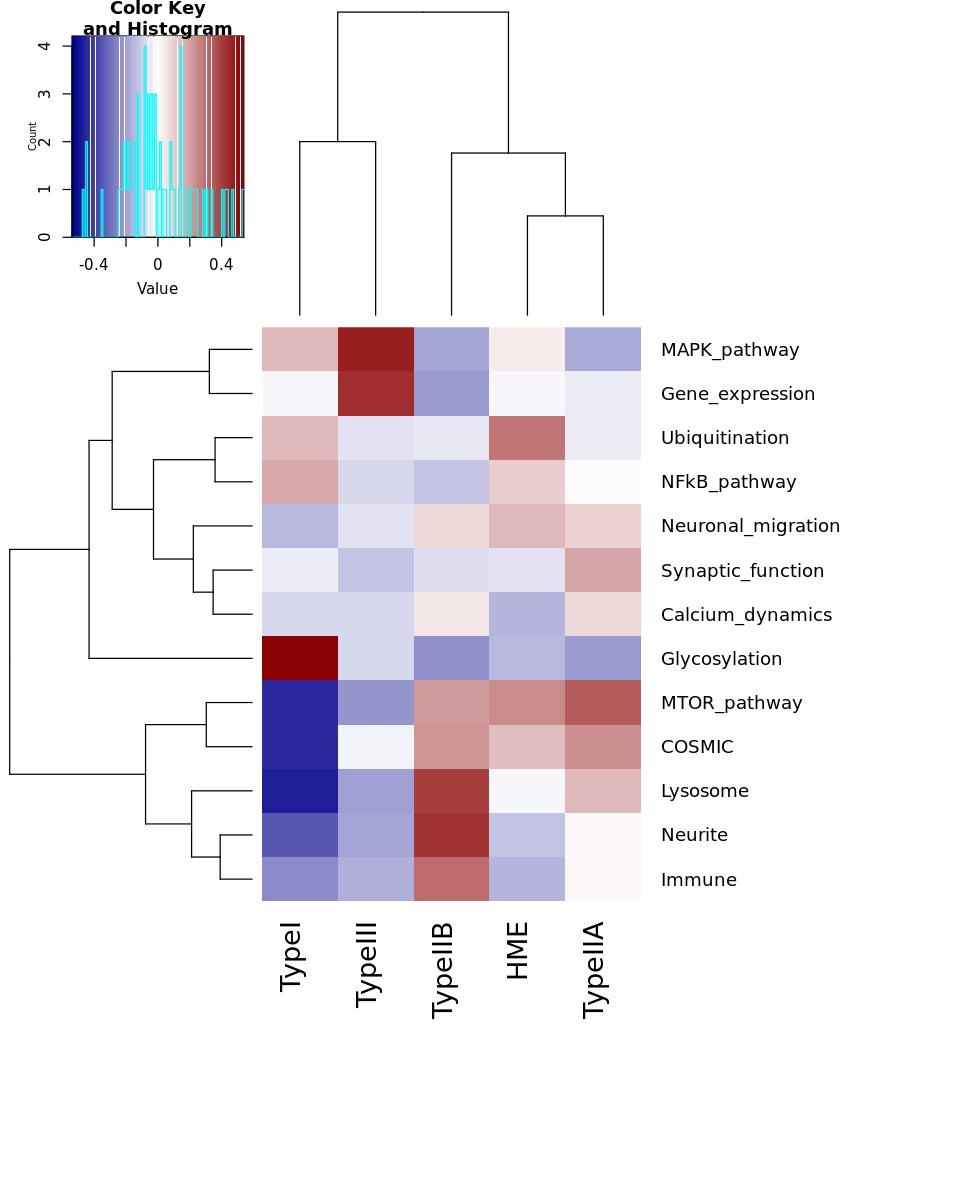

In [30]:
options(repr.plot.width=8, repr.plot.height=10)
heatmap.2(pearson_phi,scale="none",trace="none",col = colorRampPalette(c("darkblue","white","darkred"))(100),
          margins=c(15,16) 
#          , scale = c("column")
         )

In [35]:
pdf(file = "./clinical_association/Supplementary Table 4a_cor_heatmap.pdf", width= 10, height=10)  # The directory you want to save the file in
heatmap.2(pearson_phi,scale="none",trace="none",col = colorRampPalette(c("darkblue","white","darkred"))(100),margins=c(15,16))
dev.off()

png 
  2

In [32]:
pearson_pval

,HME,TypeI,TypeIIA,TypeIIB,TypeIII
MTOR_pathway,0.03855619,1.456905e-04,0.005207471,0.0834609228,6.866830e-02
MAPK_pathway,0.76490271,2.402618e-01,0.158567431,0.1317280780,5.538383e-05
NFkB_pathway,0.36490829,1.427706e-01,0.957920705,0.3246137852,5.284426e-01
Synaptic_function,0.61094022,7.338280e-01,0.116617915,0.5616037723,3.009279e-01
Neurite,0.31716215,2.943913e-03,0.900308954,0.0003571643,1.317281e-01
Glycosylation,0.21848316,2.136260e-06,0.078093526,0.0594629346,5.284426e-01
Neuronal_migration,0.22611446,2.402618e-01,0.444306215,0.5329149015,6.126261e-01
Calcium_dynamics,0.18006971,4.967713e-01,0.537573783,0.6641384273,4.923056e-01
Immune,0.18799981,4.975736e-02,0.909731145,0.0112662537,1.731758e-01
Gene_expression,0.85721030,8.738990e-01,0.768860271,0.0808744764,2.258761e-04


In [39]:
pearson_pval_melt<-melt(pearson_pval)

In [41]:
write.csv(pearson_pval_melt,"./clinical_association/2022-02-07_gene_to_ILEAtype_pearson_test_cor_heatmap_pval.csv")